In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("SMSSpamCollection",sep='\t',names=['lables','text'])

In [6]:
df


,lables,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
!pip install nltk


In [8]:
send='hello friends ! how are you ?'

In [9]:
import nltk

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/najanrohit0/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to
[nltk_data]     /home/najanrohit0/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to
[nltk_data]     /home/najanrohit0/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
word_tokenize(send)

['hello', 'friends', '!', 'how', 'are', 'you', '?']

In [15]:
from nltk.corpus import stopwords

In [16]:
swords = stopwords.words('english')

In [17]:
swords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [18]:
clean = [word for word in word_tokenize(send) if word not in swords]

In [19]:
clean

['hello', 'friends', '!', '?']

In [20]:
from nltk.stem import PorterStemmer

In [21]:
ps = PorterStemmer()

In [22]:
clean=[ps.stem(word) for word in word_tokenize(send) if word not in swords]

In [23]:
clean

['hello', 'friend', '!', '?']

In [57]:
def clean_text(send):
    tokens=word_tokenize(send)
    clean=[word for word in tokens if word.isdigit() or word.isalpha()]
    clean=[ps.stem(word) for word in clean if word not in swords]
    print(clean)

In [58]:
print(clean)

['hello', 'friend', '!', '?']


In [59]:
clean_text(send)

['hello', 'friend']


In [60]:
clean

['hello', 'friend', '!', '?']

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
tfidf=TfidfVectorizer()

In [101]:
y=df['lables']

In [102]:
 
x = df['text']

In [103]:
 x_new =tfidf.fit_transform(x)

In [76]:
x.shape

(5572,)

In [77]:
x_new.shape

(5572, 8713)

In [78]:
tfidf.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [82]:
y.value_counts()

lables
ham     4825
spam     747
Name: count, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train , x_test , y_train,y_test=train_test_split(x_new , y ,random_state=0,test_size=0.25)

In [85]:
x_train.shape

(4179, 8713)

In [86]:
x_test.shape

(1393, 8713)

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
nb=GaussianNB()

In [90]:
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [91]:
y_pred=nb.predict(x_test.toarray())

In [92]:
y_test.value_counts()

lables
ham     1208
spam     185
Name: count, dtype: int64

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay

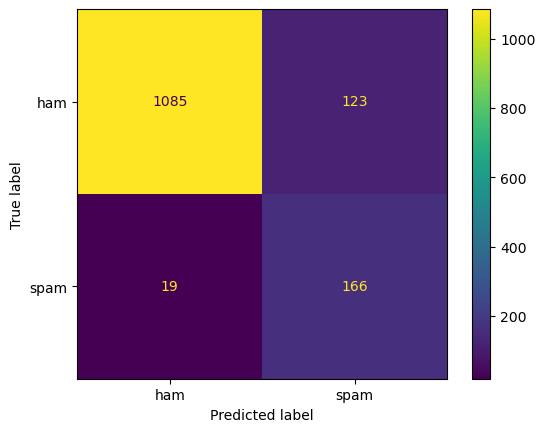

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [96]:
from sklearn.metrics import accuracy_score,classification_report

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.90      0.94      1208
        spam       0.57      0.90      0.70       185

    accuracy                           0.90      1393
   macro avg       0.78      0.90      0.82      1393
weighted avg       0.93      0.90      0.91      1393



In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
log=LogisticRegression()

In [106]:
log.fit(x_train,y_train)

LogisticRegression()

In [107]:
y_pred=log.predict(x_test)

In [108]:
accuracy_score(y_test,y_pred)

0.9612347451543432

In [109]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid={
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2'],
    'random_state':[0,1,2,3,4],
    'class_weight':['balanced','balanced_subsamples']

    
}

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()   # <-- define model


In [122]:

grid = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

In [123]:
grid.fit(x_train,y_train)

/home/najanrohit0/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/home/najanrohit0/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/najanrohit0/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/najanrohit0/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_con

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsamples'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [124]:
rf =grid.best_estimator_

In [125]:
y_pred=rf.predict(x_test)

In [126]:
accuracy_score(y_test,y_pred)

0.9798994974874372